Problem Statemnet-
Prepare a classification model using SVM for salary data 
Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


#### importing pandas library

In [1]:
import pandas as pd

####  Reading the data

In [2]:
pd.read_csv('E:\\deeksha\\python\\data\\forestfires.csv')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
sal_train= pd.read_csv('E:\\deeksha\\python\\data\\SalaryData_Train(1).csv')

#### Performing EDA on data

In [4]:
# checking the data

In [5]:
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
sal_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


#### Checking for Null's and Na's

In [7]:
sal_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
sal_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### Checking for unique values in data

In [9]:
sal_train["Salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
import numpy as np

#### Creating a new TARGET column with reference to SALARY column

In [11]:
sal_train['target'] = np.where(sal_train["Salary"] == ' >50K', 1, 0)

In [12]:
sal_train['target']

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: target, Length: 30161, dtype: int32

In [13]:
sal_train.drop(['Salary'],axis=1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [14]:
sal_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek,target
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269,0.248931
std,13.134830,2.550037,7406.466611,404.121321,11.980182,0.432401
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [15]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
 14  target         30161 non-null  int32 
dtypes: int32(1), int64(5), object(9)
memory usage: 3.3+ MB


#### Correlation among features in the data

In [16]:
sal_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,target
age,1.000000,0.043525,0.080152,0.060278,0.101598,0.241991
educationno,0.043525,1.000000,0.124416,0.079691,0.152522,0.335287
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431,0.221195
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454,0.150222
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000,0.229480
target,0.241991,0.335287,0.221195,0.150222,0.229480,1.000000


#### Plotting a Heat Map

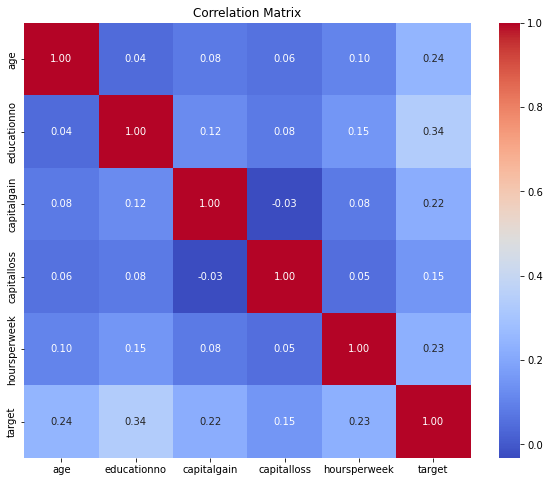

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(data=sal_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [18]:
#PLotting Graph to see relation between age_group and their count

<AxesSubplot:xlabel='Salary', ylabel='age'>

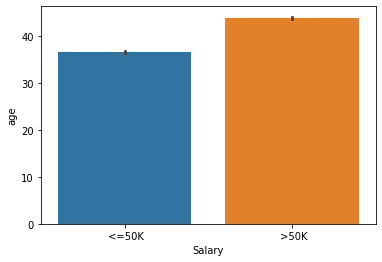

In [51]:
sns.barplot(x= 'Salary',y='age',data= sal_train)

In [52]:
# Checking shape and size

In [53]:
sal_train.shape

(30161, 15)

In [54]:
sal_train.size

452415

### Splitting the data into independent variable and dependent variable

In [55]:
X_train = sal_train.iloc[:,:13]

In [56]:
y_train = sal_train.iloc[:,13]

In [57]:
X_train.shape, y_train.shape

((30161, 13), (30161,))

#### Dummiflying the data to convert categorical data into numeric

In [58]:
X_train = pd.get_dummies(X_train, columns=['workclass', 'education','maritalstatus','occupation','relationship','race','sex','native'], drop_first=True)

In [59]:
X_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Normalizing the data using standard scalar

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [61]:
scaled_X_train

array([[ 0.04277892,  1.12889813,  0.14608503, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 0.88026081,  1.12889813, -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-0.0333558 , -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       ...,
       [ 1.48933854, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-1.25151126, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 1.03253024, -0.4397325 ,  1.88108414, ...,  0.31081205,
        -0.04611353, -0.0230384 ]])

In [62]:
X_train.shape

(30161, 94)

In [63]:
sal_train['target'] = np.where(sal_train["Salary"] == ' >50K', 1, 0)

In [64]:
y_train = sal_train['target']

In [65]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [66]:
y_train.shape

(30161,)

#### Reading test data

In [67]:
sal_test =pd.read_csv("E:\\deeksha\\python\\data\\SalaryData_Test(1).csv")

In [68]:
sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [69]:
sal_test.shape

(15060, 14)

In [70]:
sal_test.size

210840

In [71]:
sal_test['target'] = np.where(sal_test["Salary"] == ' >50K', 1, 0)

In [72]:
sal_test.drop(['Salary'],axis=1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,target
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [73]:
## Correaltion among features

In [74]:
sal_test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,target
age,1.000000,0.026123,0.078760,0.057745,0.102758,0.227469
educationno,0.026123,1.000000,0.131750,0.085817,0.133691,0.327813
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501,0.220882
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712,0.145967
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000,0.222665
target,0.227469,0.327813,0.220882,0.145967,0.222665,1.000000


In [75]:
X_test = sal_test.drop(['target','Salary'], axis=1)

In [76]:
X_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


#### Dummiflying the data to convert categorical data into numeric

In [77]:
X_test = pd.get_dummies(X_test, columns=['workclass', 'education','maritalstatus','occupation','relationship','race','sex','native'], drop_first=True)

In [78]:
X_test.shape

(15060, 94)

#### Normalizing the data using standard scaler

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_test = scaler.fit_transform(X_test)

In [80]:
y_test= sal_test['target']

In [81]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: target, Length: 15060, dtype: int32

In [82]:
y_test.shape, y_test.size

((15060,), 15060)

In [83]:
scaled_X_test

array([[-1.02900513, -1.2165628 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 ,  0.562734  , ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441]])

### Building Model on X_train

In [84]:
# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


In [85]:
# clf = SVC()
# param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[1,0.1,0.001] }]
# gsv = RandomizedSearchCV(clf,param_grid,cv=5)
# gsv.fit(X_train,y_train)

In [86]:
clf = SVC()

In [87]:
clf.fit(scaled_X_train, y_train)

SVC()

In [56]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])